<a href="https://colab.research.google.com/github/sinha-debojyoti/SoundToTextClassificationAI/blob/main/EncoderSoundToNumpyFile3DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
y, sr = librosa.load("/content/drive/MyDrive/ProcessedData/SoundFiles/02998dce-518e-43c7-b7e2-c546d2dfb8d6.wav", dtype=np.float64)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

d = np.array_split(D, 200)

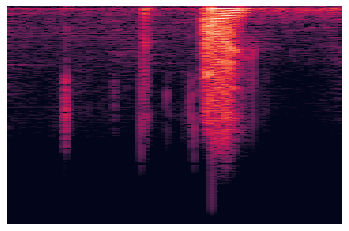

In [ ]:
sns.heatmap(D, xticklabels=False, yticklabels=False, cbar=False)

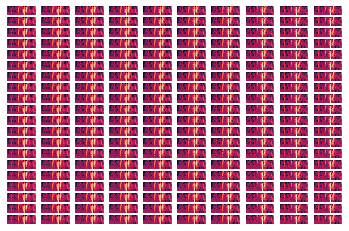

In [ ]:
for i in range(200):
    ax = plt.subplot(20, 10, i + 1)
    sns.heatmap(d[0], xticklabels=False, yticklabels=False, cbar=False, ax=ax)

In [ ]:
def encoder_wav_to_numpy(filename):
    y, sr = librosa.load(filename)
    slpit_size = 200

    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    d = np.array_split(D, slpit_size)

    new_data = []

    for i in range(slpit_size):
        fig, ax = plt.subplots(figsize=(1, 1))

        ax.set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.margins(0, 0)

        sns.heatmap(d[i], xticklabels=False, yticklabels=False, cbar=False, ax=ax)
        fig.canvas.draw()
        X = np.array(fig.canvas.renderer.buffer_rgba())
        plt.ioff()
        plt.clf()
        

        new_data.append(X)
        del X

    del y, sr, D, d

    return new_data

In [ ]:
hi = 1
hello = 1
bye = 1

with open("/content/drive/MyDrive/ProcessedData/soundFileDetails.csv", mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
            continue
        
        print(line_count, end=" ")
#         print(row["fileName"], row["spoken_text"])
        
        orgin_file =  r"/content/drive/MyDrive/ProcessedData/SoundFiles/" + row["fileName"]
        
        if row["spoken_text"] == "hi":
            dest_file = r"/content/drive/MyDrive/ProcessedData/hi/hi." + str(hi)
            
            data = encoder_wav_to_numpy(orgin_file)
            np.save(dest_file, data)
            del data
            
#             shutil.copyfile(orgin_file, dest_file)
            
            print(orgin_file + " to " + dest_file)
            
            hi += 1
            
        if row["spoken_text"] == "hello":
            dest_file = r"/content/drive/MyDrive/ProcessedData/hello/hello." + str(hello)
            
            data = encoder_wav_to_numpy(orgin_file)
            np.save(dest_file, data)
            del data
#             shutil.copyfile(orgin_file, dest_file)
            
            print(orgin_file + " to " + dest_file)
            
            hello += 1
            
        if row["spoken_text"] == "bye":
            dest_file = r"/content/drive/MyDrive/ProcessedData/bye/bye." + str(bye)
            
            data = encoder_wav_to_numpy(orgin_file)
            np.save(dest_file, data)
            del data
#             shutil.copyfile(orgin_file, dest_file)
            
            print(orgin_file + " to " + dest_file)
            
            bye += 1
      
        line_count += 1